In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

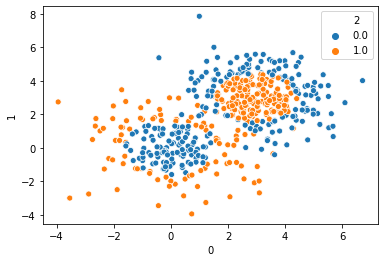

In [68]:
data = pd.read_csv('demo_data/3.concertriccir2.csv',header=None)
sns.scatterplot(x=0,y=1,hue=2,data=data)

In [69]:
data

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:2],data.iloc[:,2],test_size=0.3)
score = list()
for i in range(2,30,2):
    
    sim_neigh = KNeighborsClassifier(n_neighbors=i)
    sim_neigh.fit(X_train,y_train)
    score.append(sim_neigh.score(X_test,y_test))
score

[0.88,
 0.88,
 0.8466666666666667,
 0.84,
 0.8533333333333334,
 0.84,
 0.82,
 0.8266666666666667,
 0.8133333333333334,
 0.8066666666666666,
 0.78,
 0.7866666666666666,
 0.7666666666666667,
 0.76]

In [71]:
score2 = list()
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    score2.append(accuracy_score(y_test, pred, normalize=True))
    print('\n CV Accuracy for k = %d is %d %%' %(i,acc))


 CV Accuracy for k = 1 is 84 %

 CV Accuracy for k = 3 is 89 %

 CV Accuracy for k = 5 is 86 %

 CV Accuracy for k = 7 is 83 %

 CV Accuracy for k = 9 is 86 %

 CV Accuracy for k = 11 is 85 %

 CV Accuracy for k = 13 is 83 %

 CV Accuracy for k = 15 is 81 %

 CV Accuracy for k = 17 is 82 %

 CV Accuracy for k = 19 is 79 %

 CV Accuracy for k = 21 is 76 %

 CV Accuracy for k = 23 is 78 %

 CV Accuracy for k = 25 is 77 %

 CV Accuracy for k = 27 is 77 %

 CV Accuracy for k = 29 is 75 %


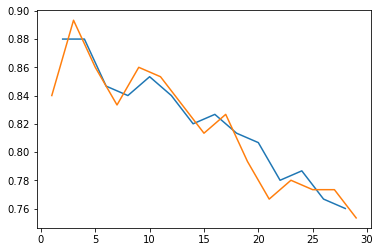

In [72]:
sns.lineplot(y=score,x=range(2,30,2))
sns.lineplot(y=score2,x=range(1,30,2))

- The above shows the Test accuracy , as it is na toy set it shows an overall decreasing graph
- But in real world it is some what like downward facing parabola

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- ### Visualising The decision boundary of K-NN

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


## Implementing the ramdomsearch cv knn

In [65]:
ListedColormap(['#FFAAAA', '#AAAAFF'])